## Data science tutorial using the kaggle Titanic data set


This tutorial is an introduction into data science with python and introduces pandas and some statistics.
Also it shows how to get a dataset from kaggle. For this you must `pip install kaggle` and store your credentials for the API in `~/.kaggle/kaggle.json`

Following along http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-14.html

```
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)
```

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%bash
kaggle datasets download -d hesh97/titanicdataset-traincsv
unzip /home/pgadow/.kaggle/datasets/hesh97/titanicdataset-traincsv/titanicdataset-traincsv.zip
mv train.csv titanic_train.csv

titanicdataset-traincsv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /home/pgadow/.kaggle/datasets/hesh97/titanicdataset-traincsv/titanicdataset-traincsv.zip
  inflating: train.csv               


In [4]:
# read kaggle titanic dataset
titanic_train = pd.read_csv("titanic_train.csv")

In [5]:
# top column of dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# summary of numerical datatypes
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# summary of categorical datatypes 
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)
titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Chambers, Mr. Norman Campbell",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
# clean up data
del titanic_train['PassengerId']
del titanic_train['Ticket']

In [9]:
# demo how to change category
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [27]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)
new_Pclass = new_Pclass.rename_categories([1,2,3])     
new_Pclass.describe()

,counts,freqs
categories,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


In [28]:
# replace class variable
titanic_train["Pclass"] = new_Pclass

In [12]:
# summary of numerical datatypes
titanic_train.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# summary of categorical datatypes 
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)
titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Cabin,Embarked
count,891,891,204,889
unique,891,2,147,3
top,"Chambers, Mr. Norman Campbell",male,C23 C25 C27,S
freq,1,577,4,644


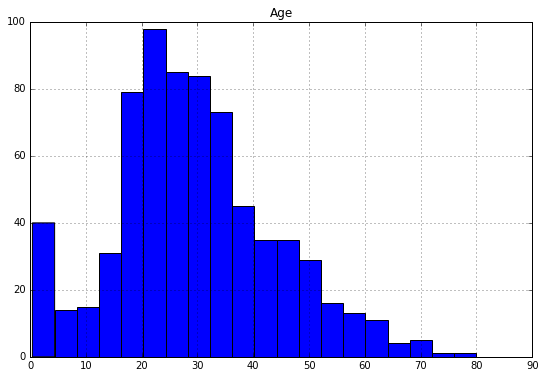

In [14]:
# there are lots of NaNs for the age variable. which substitute could be used?
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20);        # Number of histogram bins

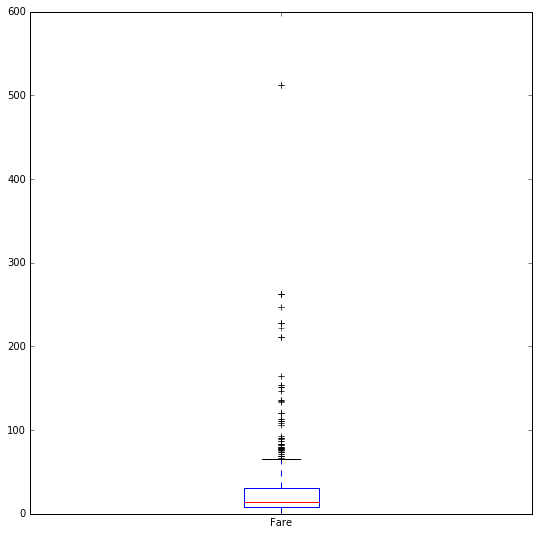

In [15]:
# investigate spread of fare
titanic_train["Fare"].plot(kind="box",
                           figsize=(9,9));

In [16]:
#whoa, someone really paid a lot. who is it?
index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )
titanic_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C


In [17]:
# find out something about the family members on board
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

In [18]:
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))
titanic_train.ix[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,NaN,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,NaN,S,10
201,0,Class3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,NaN,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,NaN,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,NaN,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,NaN,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,NaN,S,10


In [19]:
# check correlation numbers
titanic_train.corr()

,Survived,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307,0.016639
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,-0.301914,0.890712,0.783111,0.217138,1.000000


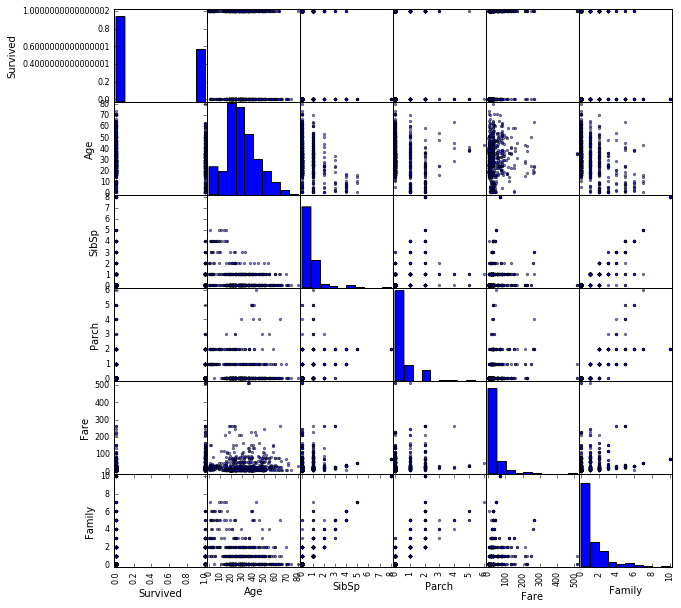

In [20]:
# study correlations
from pandas.tools.plotting import scatter_matrix
noncategorical = titanic_train.dtypes[titanic_train.dtypes != "object"].index
scatter_matrix(titanic_train[noncategorical],   # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='hist');    # Show distribution estimates on diagonal

In [30]:
# let's do better on imputing the age of passengers
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',  # Create imputation model
              strategy='mean',       # Use mean imputation
              axis=0)                # Impute by column

imputed_ages = imp.fit_transform(titanic_train[noncategorical])   # Use imputation model to get values

imputed_df = pd.DataFrame(imputed_ages,  # Remake DataFrame with new values
                           index=titanic_train[noncategorical].index,
                           columns = titanic_train[noncategorical].columns)

imputed_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
0,0.0,3.0,22.000000,1.0,0.0,7.2500,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0
2,1.0,3.0,26.000000,0.0,0.0,7.9250,0.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,1.0
4,0.0,3.0,35.000000,0.0,0.0,8.0500,0.0
5,0.0,3.0,29.699118,0.0,0.0,8.4583,0.0
6,0.0,1.0,54.000000,0.0,0.0,51.8625,0.0
7,0.0,3.0,2.000000,3.0,1.0,21.0750,4.0
8,1.0,3.0,27.000000,0.0,2.0,11.1333,2.0
9,1.0,2.0,14.000000,1.0,0.0,30.0708,1.0
